<a href="https://colab.research.google.com/github/NehaFariyal/project/blob/main/major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/data (1).csv')


In [3]:
print(data.isnull().sum())


footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


In [4]:
data.fillna(data.mean(), inplace=True)


In [6]:
data = pd.get_dummies(data, columns=['tempMode'], drop_first=True)

In [7]:
X = data.drop('fail', axis=1)
y = data['fail']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [11]:
y_pred = model.predict(X_test_scaled)


In [12]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       102
           1       0.85      0.89      0.87        87

    accuracy                           0.87       189
   macro avg       0.87      0.87      0.87       189
weighted avg       0.87      0.87      0.87       189



Confusion Matrix:


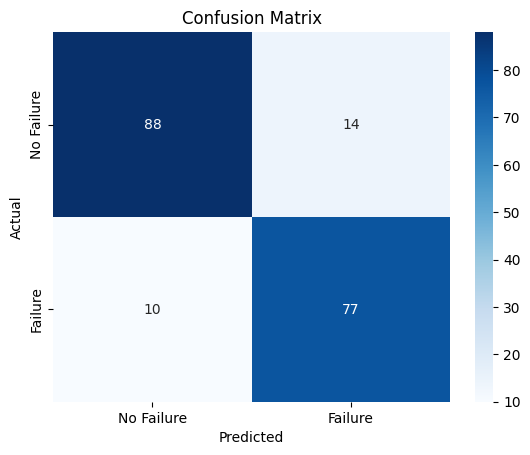

In [13]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

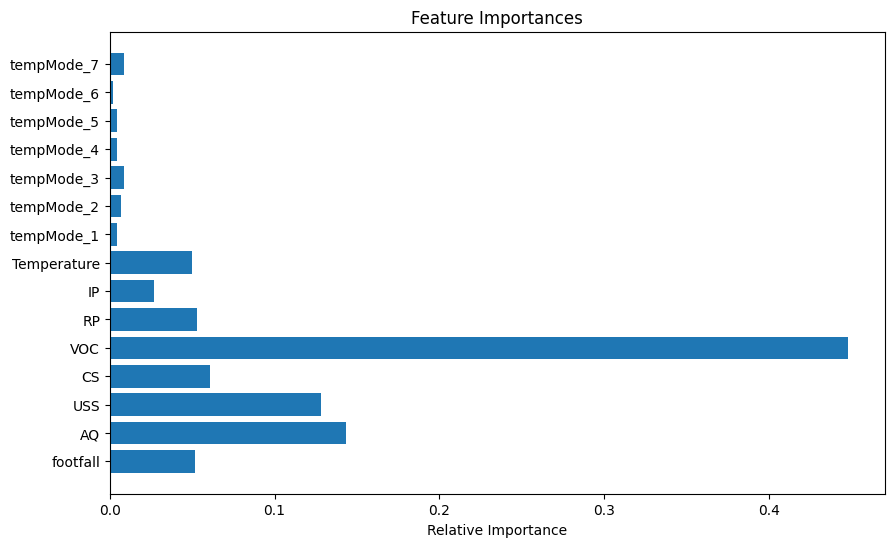

In [14]:
importances = model.feature_importances_
indices = X.columns
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(indices, importances)
plt.xlabel("Relative Importance")
plt.show()